# Artigo 8 - Entendendo a CNN

## Autor

Nome: Danilo César Tertuliano Melo

Matrícula: 221031149

Github: DaniloCTM

---

## Objetivo 

Esse atigo tem como objetivo explorar as etapas de uma rede neural convolucional. Ao final foi criado um modelo usando o fastai.

# Passo 1 - Preparando o Ambiente

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from fastai.vision.all import *

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import torch

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
!pip install duckduckgo_search

# Passo 2 - Entendendo a CNN

Inicialmente é preciso definir a imagen de entrada e um kernel. Para isso foi selecionado uma imagem do dataset mnist e o kernel foi criado de forma aleatória.

In [2]:
image = torch.tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  48., 238., 252., 252., 252., 237.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  54., 227., 253., 252., 239., 233., 252.,  57.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         10.,  60., 224., 252., 253., 252., 202.,  84., 252., 253., 122.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        163., 252., 252., 252., 253., 252., 252.,  96., 189., 253., 167.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  51.,
        238., 253., 253., 190., 114., 253., 228.,  47.,  79., 255., 168.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  48., 238.,
        252., 252., 179.,  12.,  75., 121.,  21.,   0.,   0., 253., 243.,
         50.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  38., 165., 253.,
        233., 208.,  84.,   0.,   0.,   0.,   0.,   0.,   0., 253., 252.,
        165.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   7., 178., 252., 240.,
         71.,  19.,  28.,   0.,   0.,   0.,   0.,   0.,   0., 253., 252.,
        195.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  57., 252., 252.,  63.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 253., 252.,
        195.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., 198., 253., 190.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255., 253.,
        196.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  76., 246., 252., 112.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 253., 252.,
        148.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  85., 252., 230.,  25.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   7., 135., 253., 186.,
         12.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  85., 252., 223.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   7., 131., 252., 225.,  71.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  85., 252., 145.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  48., 165., 252., 173.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  86., 253., 225.,   0.,   0.,
          0.,   0.,   0.,   0., 114., 238., 253., 162.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  85., 252., 249., 146.,  48.,
         29.,  85., 178., 225., 253., 223., 167.,  56.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  85., 252., 252., 252., 229.,
        215., 252., 252., 252., 196., 130.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  28., 199., 252., 252., 253.,
        252., 252., 233., 145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  25., 128., 252., 253.,
        252., 141.,  37.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]])

In [3]:
kernel = torch.tensor([[1,1,1],
                       [-1,-1,-1],
                       [-1,-1,-1]])

# Definindo as Funções

A primeira função é para exibir a matriz em forma de imagem para facilitar o entendimento.

In [4]:
def plot_img(data):
    plt.imshow(data, cmap='gray', interpolation='nearest')
    #for i in range(data.shape[0]):
    #    for j in range(data.shape[1]):
    #        plt.text(j, i, str(int(data[i, j])), ha='center', va='center', color='red')
    plt.show()

A segunda função é responsável por fazer a convolução, ela recebe como parametros a imagem e o kernel (o tamanho do kernel pode variar). O resultado gerado por essa função vai ser uma matriz menor que a inicial.

In [5]:
def convolution(image, kernel):
    size = image.shape
    result = torch.zeros(size[0]-2, size[1]-2)
    for i in range(size[0]-2):
        for j in range(size[1]-2):
            result[i][j] += sum(sum(kernel * image[i:i+kernel.shape[1], j:j+kernel.shape[1]]))
    return result

Após sair da função de convolução é preciso aplicar alguma função de ativação para normalizar os valores. Para esse caso eu escolhi a função relu, ela verifica se o número é maior que 0, se ele for menor ela atualiza o número para zero.

In [6]:
def relu(data):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]): 
            data[i][j] = max(0,int(data[i][j]))
    return data

Depois temos a função de pooling, existem três tipos de pooling (max, min e avg). Para esse exemplo foi usado a função com o max, ela pega o maior valor.

In [13]:
def maxpooling(data, kernel_size = 2):
    size = data.shape
    result = torch.zeros(round(size[0]/kernel_size), round(size[1]/kernel_size))
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i][j] = data[(i*kernel_size):kernel_size*(i+1),(j*kernel_size):kernel_size*(j+1)].max()
    return result

Por fim temos o dropout, ele pega o resultado e multiplica por uma matriz aleatória. Isso é feita para o modelo ficar mais generalista, também é uma forma de aumentar a quantidade de dados disponíveis para o modelo poder aprender.

In [28]:
def dropout(data):
    random_m = torch.rand(data.shape[0], data.shape[0])
    return data*random_m

# Vendo o Processo

Agora usando a função ```plot_image``` podemos ver de forma mais visual o funcionamento.

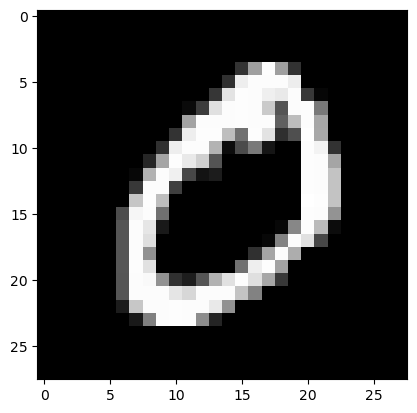

In [22]:
plot_img(image)

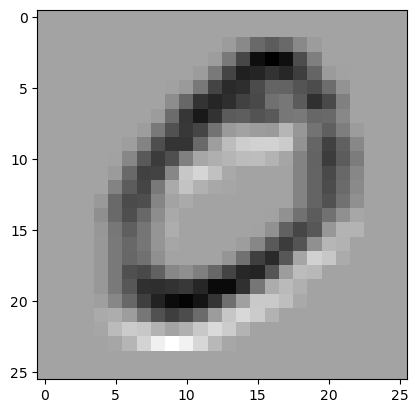

In [23]:
result = convolution(image, kernel)

plot_img(result)

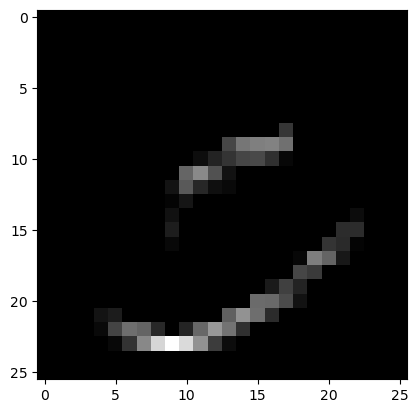

In [24]:
relu(result)
plot_img(result)

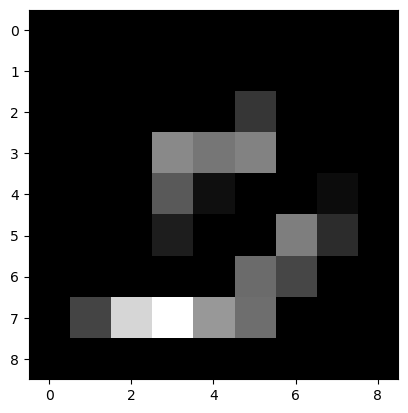

In [25]:
result = maxpooling(result)
plot_img(result)

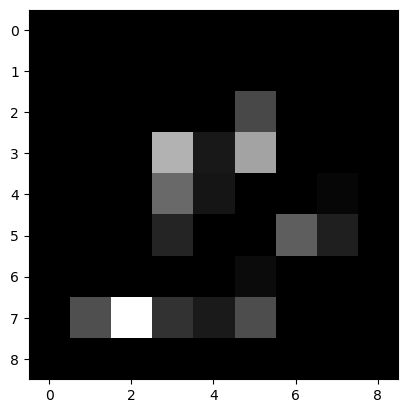

In [30]:
result = dropout(result)
plot_img(result)

Depois que chegamos no final é aplicado uma função de ativação e é calculado o erro para ajustar os kernels.

----


# Passo 3 - Criando um Modelo 

Começamos baixando as imagens por meio da API do duckduckgo.

In [3]:
from fastai.vision.all import *
from fastdownload import download_url

from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=100):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
searches = 'bart','homer'
path = Path('bart_or_homer')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}'))
    resize_images(path/o, max_size=400, dest=path/o)
    
path = Path('/kaggle/working/bart_or_homer')

In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

8

Agora criamos o datablock com as imagens baixadas.

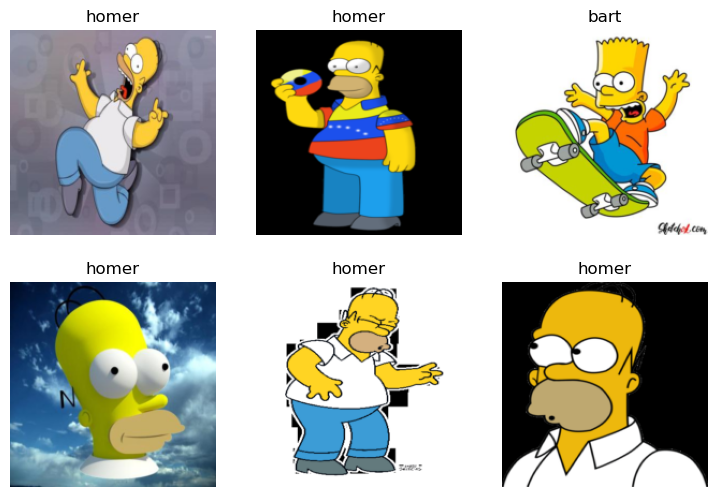

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Criamos o modelo e treinamos ele. O modelo escolhido foi o Alexnet, esse modelo foi o ganhador da competição imagenet em 2012. Esse modelo possui várias camadas de convolução.

In [8]:
learn = vision_learner(dls, alexnet, metrics=error_rate)
learn.fine_tune(5)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:11<00:00, 20.8MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,1.164699,0.646149,0.343750,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.559307,0.370577,0.156250,00:07
1,0.432038,0.254784,0.093750,00:08
2,0.358505,0.233376,0.093750,00:08
3,0.282599,0.231147,0.093750,00:07
4,0.231348,0.236247,0.093750,00:08


Em seguida fazemos um teste só para verificar o funcionamento do modelo.

This is a: homer.
Probability it's a homer: 0.9537


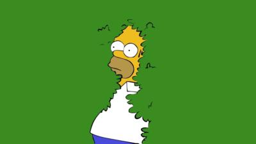

In [24]:
dest = '/kaggle/working/bart_or_homer/homer/e9cf8f2c-8f37-42e1-9864-3b7ba3d76559.jpg'
bart_homer,_,probs = learn.predict(PILImage.create(dest))
print(f"This is a: {bart_homer}.")
if bart_homer == 'bart':
    print(f"Probability it's a {bart_homer}: {probs[0]:.4f}")
else: 
    print(f"Probability it's a {bart_homer}: {1-probs[0]:.4f}")
im = Image.open(dest)
im.to_thumb(256,256)

# Passo 4 - Deploy do Modelo

Por fim, fazemos o deploy do modelo no Hugging Face. [Aqui](https://huggingface.co/spaces/DaniloTertu/Lesson-8)

In [25]:
learn.export('model.pkl')

# Conclusão

Com essa lição foi possível entender com profundidade o funciomaneto de uma rede neural convolucional. Esses modelos são complexos e possuem diversas etapas para chegar ao resultado final. Conhecendo essas etapas é possível fazer ajustes com base no dado para obter melhores resultados.